In [1]:
##########################################ALL NEEDED IMPORT FOR THE PROJECT ############################################
####################General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
###################Imports for Splitting Data
from sklearn.model_selection import train_test_split
###################Imports for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
###################Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
###################GridSearch
from sklearn.model_selection import GridSearchCV
##################Import Binarize
from sklearn .preprocessing import binarize
##################Imports for Clasification Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
###################Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
###################StringIO
from sklearn.externals.six import StringIO 
from IPython.display import Image



In [43]:
###########################################################################################################################

In [44]:
##########################   HELPER FUNCTION I HAVE WIRTTEN TO MAKE ANALYSYS EASY     ####################################

In [159]:
#CAUTION - VERY HEAVY FUNCTION --- keep the folds under check or it Might result in Noteboot Hang or System Hang :)
def Plot_Roc_Classification(df, input_cols, output_col,t_size=0.3, random_state=1, folds=2):
     #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=random_state)
    
    print("AUC(Area Under the Curve) and Corss Validation Accuracy({0} folds) :\n".format(folds))
    print("____________________________________________________________________________________________\n")
    kfold = KFold(n_splits=folds, random_state=random_state)
    
    model = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
    fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    print("Decission Tree Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("Decission Tree Classifier - Cross Validation mean Accuray for {0} folds is : {1}\n".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    
    model = RandomForestClassifier(n_estimators=1).fit(x_train,y_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print("RandomForest Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("RandomForest Classifier - Cross Validation mean Accuray for {0} folds is : {1}\n".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    
    
    model = AdaBoostClassifier().fit(x_train,y_train)
    fpr3, tpr3, thresholds3 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print("AdaBoost Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("AdaBoost Classifier - Cross Validation mean Accuracy for {0} folds is : {1}\n".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    
    
    model = GradientBoostingClassifier().fit(x_train,y_train)
    fpr4, tpr4, thresholds4 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print("GradientBoosting Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("GradientBoosting Classifier - Cross Validation mean Accuracy for {0} folds is : {1}\n".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    
                
    plt.plot(fpr1, tpr1, color='red', label='Decission Tree')
    plt.plot(fpr2, tpr2, color='blue', label = 'Random Forest')
    plt.plot(fpr3, tpr3, color='green', label = 'AdaBoost')
    plt.plot(fpr4, tpr4, color='yellow', label = 'GradientBoost')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.legend(loc='lower right')
    

In [4]:
##############                          C L A S S I F I C A T I O N                                      ##################

In [128]:
def Use_RandomForest(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0,min_max = False,n_estimator =1, min_samples_split=2,min_samples_leaf=1,max_features=10,Grid = False, Roc=False,hack_threshold = 0.5, plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
    print(type(x_train))
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    if (max_features > X.shape[1]):
        max_features = X.shape[1]
 
    model = RandomForestClassifier(n_estimators=n_estimator,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)
    print(model)
    model.fit(x_train, y_train)
        
    y_pred = model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________\n")
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(Roc == True):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
        print("\n\nAUC(Area Under the Curve) : {0}\n".format(auc))
        print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, color='blue', label='Random Forest', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.legend(loc='lower right')
        
    if(hack_threshold != 0.5):
        roc = False
        plot = False
        binarize_predict(model, x_test, y_test, threshold=hack_threshold)
    if(plot == True):
        print("Comparing Distribution of y_test and y_predict")
        print("y_test(Red) and y_pred(Green) --- Distributions")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
    

In [6]:
def Use_DecissionTree(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0,min_max = False,max_depth=None,max_features=None,min_samples_split =2, min_samples_leaf=1,out_file='tree.dot',plot=False,hack_threshold=0.5,plot_dt=False, tree_depth=2, Roc=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
    print(type(x_train))
    
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    print(linear_model)
    linear_model.fit(x_train, y_train)   
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, linear_model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________\n")
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
               
    if(hack_threshold != 0.5):
        Roc = False
        plot = False
        plot_dt = False
        binarize_predict(linear_model, x_test, y_test, threshold=hack_threshold)
       
    if(plot == True):
        print("Comparing Distribution of y_test and y_predict")
        print("y_test(Red) and y_pred(Green) --- Distributions")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
    if(Roc == True):
        fpr, tpr, thresholds = roc_curve(y_test, linear_model.predict_proba(x_test)[:,1])
        auc = roc_auc_score(y_test, linear_model.predict_proba(x_test)[:,1])
        print("\n\nAUC(Area Under the Curve) : {0}\n".format(auc))
        print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, color='blue', label='Decission Tree', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.legend(loc='lower right')
        
                    
    if(plot_dt == True):
        print("\n")
        decission_tree = tree.export_graphviz(linear_model, out_file = out_file, feature_names = X.columns, max_depth=tree_depth,filled=True)
        !dot -Tpng tree.dot -o tree.png
        if(tree_depth <= 2):
            image = plt.imread('tree.png')
            plt.figure(figsize=((15-tree_depth),(15-tree_depth)))
            plt.imshow(image)       
     
  
        
                        

In [7]:
def plot_decission_tree(size=15):
        print("Decission Tree")
        print("_____________________________________________________\n")
        image = plt.imread('tree.png')
        plt.figure(figsize=(size,size))
        plt.imshow(image)

In [61]:
###############################     CORRELATION HELPER FUNCTIONS       #####################################################

In [62]:
#Pearsons method or df.corr() is much useful in finding correlation between numerical columns and to make 
#sure the correlation between numerical and categorical (or) between two categorical columns is good I have 
#written few helper functions using Inferential statistics 

In [61]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated Two Features are

def stats_corr2(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.ttest_ind(df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 0, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [62]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated More Than 2 Features Are.

def stats_corr3(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.f_oneway(df.loc[df[output_col] == 0, input_col], df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 2, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [63]:
#My Correlation Function Using Chi2 to find Out How Correlated Two Catagorical Columns are

def stats_corr_cat(df,input_col, output_col):
    print("Correlation using Stats Chi2")
    print(stats.chi2_contingency(pd.crosstab(df[input_col],df[output_col])))

In [68]:
####################################     END OF HELPER FUNCTIONS   ######################################################

In [69]:
###########################################################################################################################

In [70]:
###################################      LAB  STARTS   HERE         ##################################################

In [71]:
########################################### ENSEMBLED LAB #############################################################

In [73]:
#################QUESTION - 1    - Load the PIMA Indian Diabetes file into Python DataFrame.

In [32]:
df = pd.read_csv('Diabetes_EST.csv')

In [33]:
#Setting Rows and Columns to Max, So that All the  Rows and Columns of The Dataset are displayed 
pd.set_option.max_rows =df.shape[0]
pd.set_option.max_columns = df.shape[1]

In [34]:
#################QUESTION -2     - Print 10 samples from the dataset

In [35]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [36]:
#Printing 10 Random Samples from the Dataset
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
19,1,115,70,30,96,34.6,0.529,32,1
596,0,67,76,0,0,45.3,0.194,46,0
531,0,107,76,0,0,45.3,0.686,24,0
587,6,103,66,0,0,24.3,0.249,29,0
218,5,85,74,22,0,29.0,1.224,32,1
500,2,117,90,19,71,25.2,0.313,21,0
692,2,121,70,32,95,39.1,0.886,23,0
349,5,0,80,32,0,41.0,0.346,37,1
448,0,104,64,37,64,33.6,0.510,22,1
503,7,94,64,25,79,33.3,0.738,41,0


In [37]:
#################QUESTION -3      - Print the datatypes of each column and the shape of the dataset

In [38]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
#Checking for Null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
#checking if data is not corrupted such as a "?" instead of a number
df[~df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [42]:
###########################Looks like Data is Clean - No Nans or Missing Values or Special Charecters :)###################

In [43]:
#################QUESTION -4      - Replace all the 0s in the column with the median of the same column value accordingly

In [44]:
#List of Columns in which has Zeros 
zlist = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']

In [45]:
for col in zlist:
    df.loc[df[col] == 0, col] = df[col].median()

In [48]:
#################QUESTION -5     - Print the descriptive statistics of each & every column using describe() function

In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
#Checking Columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#################QUESTION -5    - See the distribution of 'Class' variable and plot it using appropriate graph.

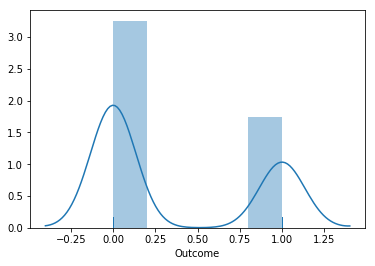

In [169]:
#Using Distplot from seaborn
sns.distplot(df['Outcome'], kde=True, rug=True)

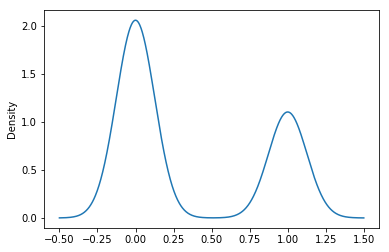

In [56]:
df['Outcome'].plot(kind='kde')

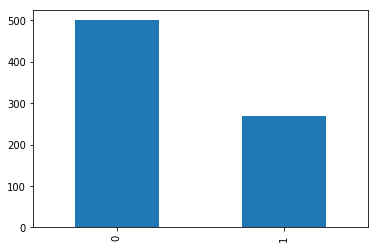

In [171]:
df['Outcome'].value_counts().plot(kind='bar')

In [57]:
#################QUESTION -5 Use pairplots and correlation method to observe the relationship #between different 
#variables and state your insights

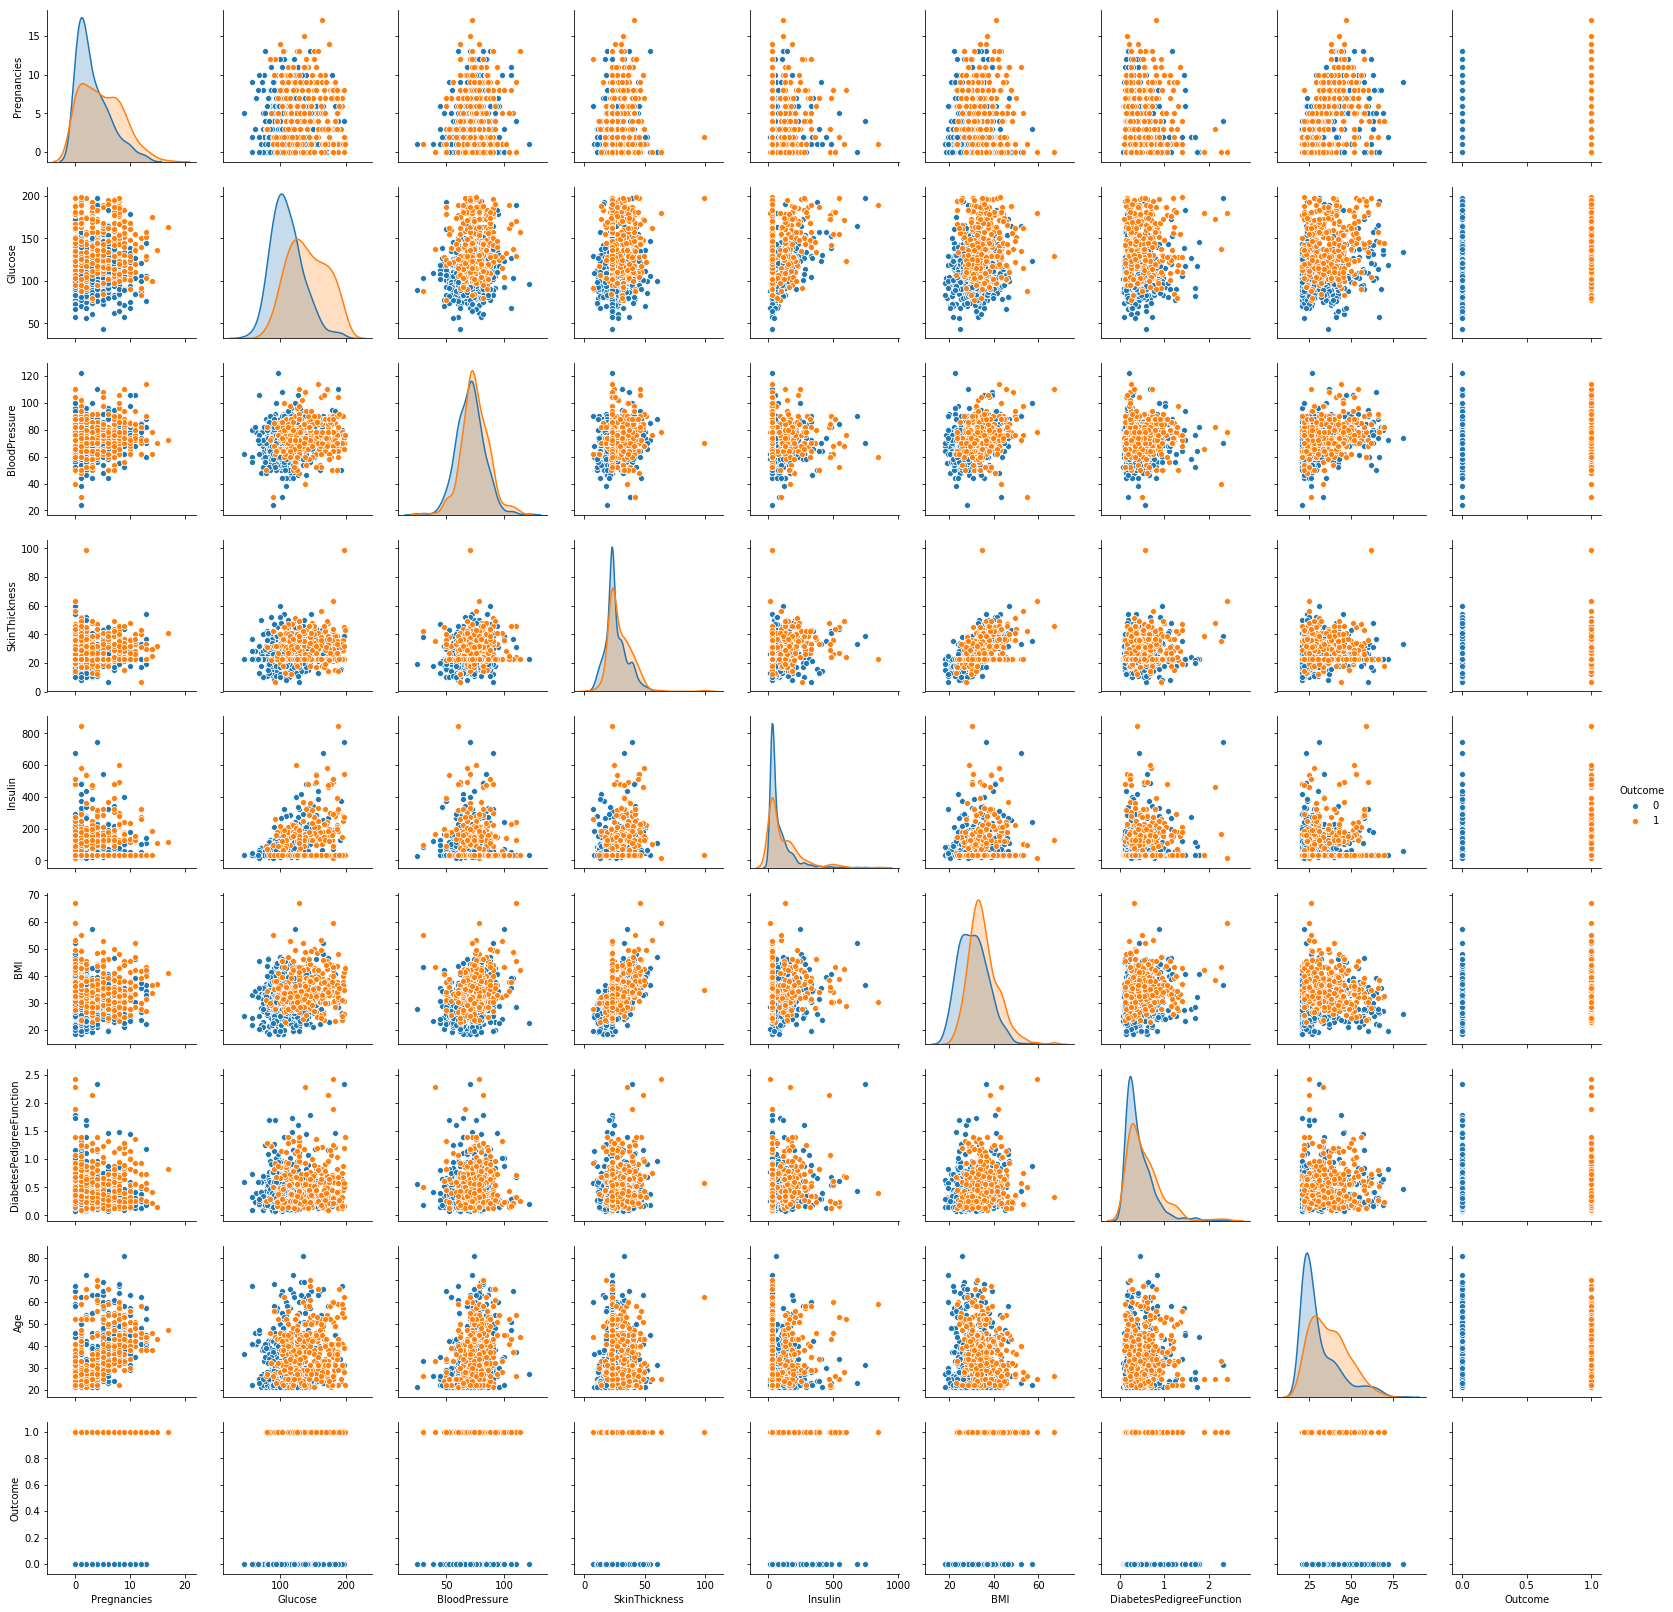

In [59]:
sns.pairplot(df, hue='Outcome')

In [ ]:
###########Checking Distributions of all the Columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CE53DF278>,
      dtype=object)

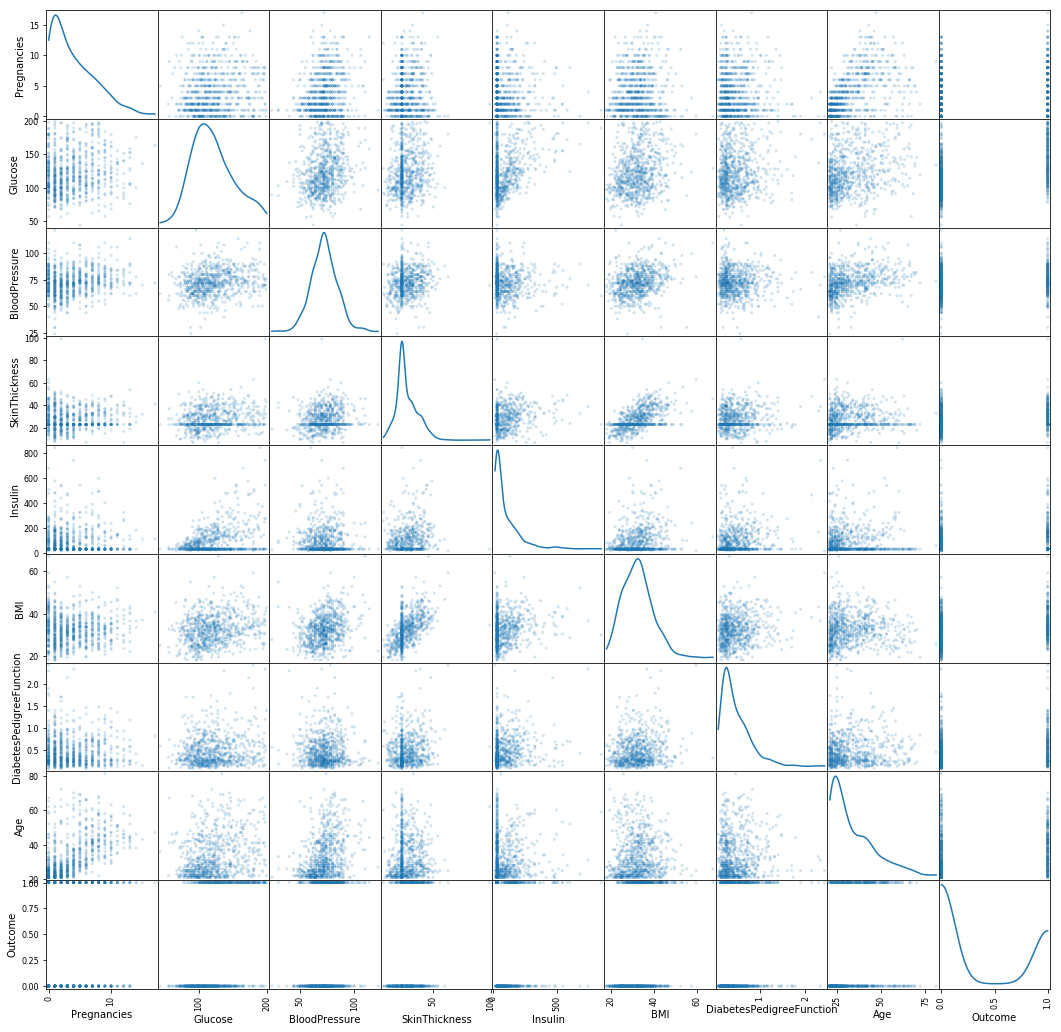

In [67]:
#QUICKY OVERVIEW OF DISTRIBUTIONS OF ALL THE COLUMNS using a Scatter Matrix
scatter_matrix(df, alpha=0.2, figsize=(18, 18), diagonal='kde')

In [ ]:
#Its clear from Distributions of all the Columns that none of the Independent Variables are in High Correlation with each
#other

In [ ]:
#Checking How Output Variable is Correlated to Input Variables 

In [ ]:
#I have written my own Helper Function which uses Inferential Stats i.e Independent T-Test to find the p-value and from
#that we can find out how correlated any colums is with the Output Column..i.e how a Numerical Column is Correlated to
#Categorical Column 

In [ ]:
#Since we are Comparing a Numerical Column to a Catergorical Column , its Wise to use Inferential Sats 

In [66]:
#HERE stats_corr2 is the my own helper function and definition is in the starting of the notebook
for col in df.columns:
    print(col)
    print("\t")
    stats_corr2(df, col, 'Outcome')

Pregnancies
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=6.298430550035151, pvalue=5.065127298053476e-10)



Glucose
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=15.673795182294105, pvalue=3.1287190418423694e-48)



BloodPressure
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=4.65097622072597, pvalue=3.8908354906479115e-06)



SkinThickness
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=5.328815733562105, pvalue=1.3011814339570038e-07)



Insulin
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=4.154847767695023, pvalue=3.621722161782352e-05)



BMI
	
Correlation Using Inferential Statistics
________________________

In [ ]:
##################### GLUCOSE and BMI  are in Better Correlation with Output Column compare to Other Columns.

In [172]:
#To Find Out the how Correlated the Independent Variables are with eaech other, we use Persons method here 
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [ ]:
################# None of the Independent Variables are In High Correlation with Each other both from Scatter matrix and
#from df.corr().

In [ ]:
################ Question8     -Split the pima_df into training and test set in the ratio of 70:30

In [70]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [72]:
################ Question9     -Create the decision tree model using “entropy” method of 
#reducing the entropy and fit it to training data

In [73]:
model = DecisionTreeClassifier(criterion='entropy')

In [74]:
#Fitting the Model
model.fit(x_train, y_train)   
    

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
#Predicting Output
y_pred = model.predict(x_test)

In [77]:
#Printing Confustion Matrix and Classification Report for the Decission Tree Model.
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________\n")

___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[111  35]
 [ 31  54]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 1.0

Test Accuracy   : 0.7142857142857143

Precision Score : 0.6067415730337079

Recall Score    : 0.6352941176470588

F1 Score        : 0.6206896551724137

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       146
           1       0.61      0.64      0.62        85

   micro avg       0.71      0.71      0.71       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.71      0.72       231

___________________________________________________



In [ ]:
#Training ACCURARY IS 1.0 ...So the Model is OverFitting as the Depth of the Tree is at its Max and We dint Tune any Other
#Hyper Parameters.

In [ ]:
#Checking Important Features using feature_importances_ from sklearn ......

In [92]:
#Feature Importances put in form of a DataFrame for Convenience
pd.DataFrame({'columns': X.columns, 'Important Features' : model.feature_importances_}).sort_values(by='Important Features', ascending=False)

,columns,Important Features
1,Glucose,0.233023
5,BMI,0.212630
2,BloodPressure,0.156051
6,DiabetesPedigreeFunction,0.114491
0,Pregnancies,0.112749
7,Age,0.112424
3,SkinThickness,0.041560
4,Insulin,0.017071


In [96]:
#Checking How the Tree Looks at the Depth of 3 and...... Want to Findout if the Split is really made based on 
#Important Features :) 

In [97]:
decission_tree = tree.export_graphviz(model, out_file = 'tree.dot', feature_names = X.columns, max_depth=3,filled=True)
!dot -Tpng tree.dot -o tree.png

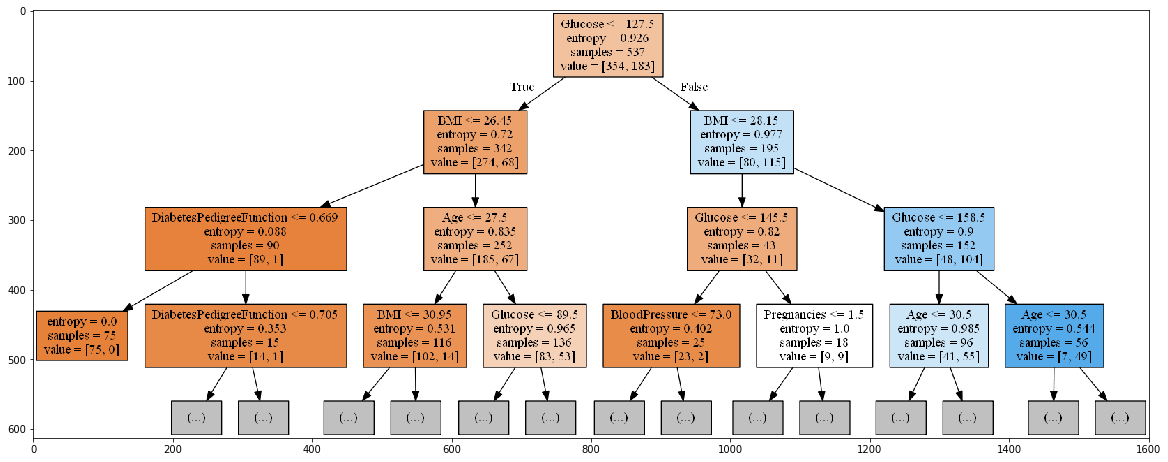

In [98]:
image = plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)

In [ ]:
##################LOOKS LIKE THE TREE IS SPLIT ON BASIS OF 'Important Features'............

In [ ]:
#Using My Own Helper Function from the starting of the Notebook .....
#Just tuning the min_samples_leaf ....as min_samples_leaf increases the depth of the Tree decreases
#So increaseing min_samples_leaf might help to to bring the model out of Overfitting 

<class 'pandas.core.frame.DataFrame'>
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[119  27]
 [ 28  57]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.8342644320297952

Test Accuracy   : 0.7619047619047619

Precision Score : 0.6785714285714286

Recall Score    : 0.6705882352941176

F1 Score        : 0.6745562130177514

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       146
    

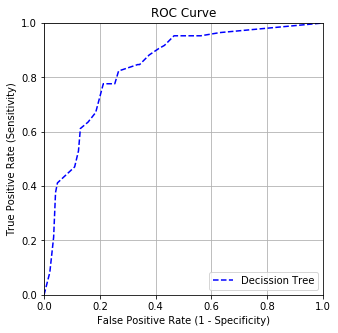

In [100]:
Use_DecissionTree(df, 0, 'Outcome', t_size=0.3, r_state=1,min_samples_leaf = 12,s_scaler=True,Roc=True)

In [ ]:
#I HAVE ALSO CALCULATED THE AUC(Area Under the Curve)..Just to find out what is the models chances of distinguishing
#between Positive and Negative Classes..........The Higher the AUC the higher the chances for the Model to Classify better.

In [ ]:
#Decission Tree has 83.8% chances of Distinguishing Between Positive and Negative Classes 

In [ ]:
####################Question12   Apply the Random forest model and print the accuracy of Random forest Model

In [ ]:
#USER HELPER FUNCTION I wrote to make life easy :) ..... 
#Tuning only min_samples_leaf to reduce the depth of the tree and to bring the model out of extreme overfit

<class 'pandas.core.frame.DataFrame'>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[121  25]
 [ 21  64]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.776536312849162

Test Accuracy   : 0.8008658008658008

Precision Score : 0.7191011235955056

Recall Score    : 0.7529411764705882

F1 Score        : 0.7356321839080459

___________________________________________________

Classification Report :

              precision    recall  f1-score   sup

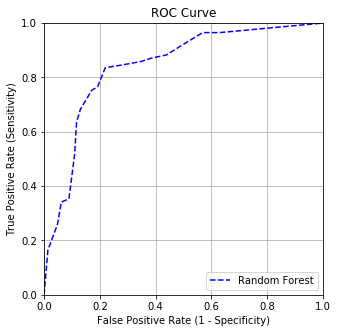

In [130]:
Use_RandomForest(df, 0, 'Outcome', t_size=0.3, r_state=1,min_samples_leaf = 12,s_scaler=True,Roc=True)

In [ ]:
#################  RANDOMFOREST HAS 84.2% chances of Classifying Positives and Negatives....

In [ ]:
###################### RANDOM FOREST SLIGHTLY DID BETTER COMPARED TO DECISSION TREE ######################################

In [275]:
################Question12   - Apply Adaboost Ensemble Algorithm for the same data and print the accuracy

In [131]:
model = AdaBoostClassifier()

In [132]:
model.fit(x_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [133]:
y_pred = model.predict(x_test)

___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[127  19]
 [ 31  54]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.8268156424581006

Test Accuracy   : 0.7835497835497836

Precision Score : 0.7397260273972602

Recall Score    : 0.6352941176470588

F1 Score        : 0.6835443037974683

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       146
           1       0.74      0.64      0.68        85

   micro avg       0.78      0.78      0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

___________________________________________________



AUC(Area Under the Curve) : 0.8400483481063659
So the modle has 84.0% chances of Distinguishing between Positive and Negati

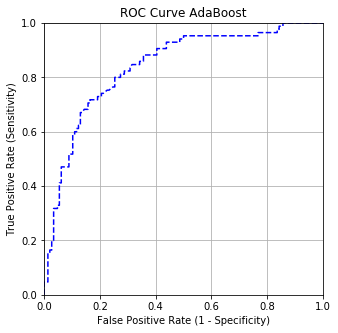

In [142]:
#Printing Confustion Matrix and Classification Report for Adaboost and Printing ROC -CURVER FOR ADABOOST
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________\n")

#Printing ROC Curver
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print("\n\nAUC(Area Under the Curve) : {0}".format(auc))
print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label='AdaBoost', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve AdaBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
#############Question14   - Apply Bagging Classifier Algorithm and print the accuracy.

In [143]:
model = BaggingClassifier()

In [144]:
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [145]:
y_pred = model.predict(x_test)

___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[127  19]
 [ 32  53]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9851024208566108

Test Accuracy   : 0.7792207792207793

Precision Score : 0.7361111111111112

Recall Score    : 0.6235294117647059

F1 Score        : 0.6751592356687899

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       146
           1       0.74      0.62      0.68        85

   micro avg       0.78      0.78      0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.77       231

___________________________________________________



AUC(Area Under the Curve) : 0.8672038678485092
So the modle has 86.72% chances of Distinguishing between Positive and Negat

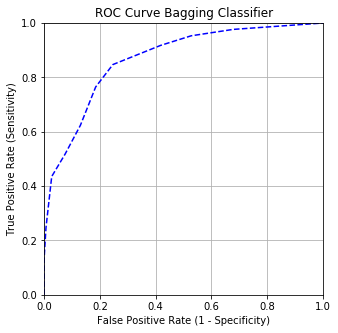

In [146]:
#Printing Confustion Matrix and Classification Report for Adaboost and Printing ROC -CURVER FOR ADABOOST
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________\n")

#Printing ROC Curver
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print("\n\nAUC(Area Under the Curve) : {0}".format(auc))
print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label='Bagging Classifier', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve Bagging Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
#############Question15   - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [147]:
model = GradientBoostingClassifier()

In [148]:
model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [149]:
y_pred = model.predict(x_test)

___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[130  16]
 [ 32  53]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9329608938547486

Test Accuracy   : 0.7922077922077922

Precision Score : 0.7681159420289855

Recall Score    : 0.6235294117647059

F1 Score        : 0.6883116883116883

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.77      0.62      0.69        85

   micro avg       0.79      0.79      0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231

___________________________________________________



AUC(Area Under the Curve) : 0.8546333601933925
So the modle has 85.46% chances of Distinguishing between Positive and Negat

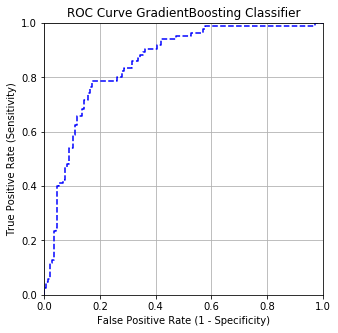

In [151]:
#Printing Confustion Matrix and Classification Report for Adaboost and Printing ROC -CURVER FOR ADABOOST
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________\n")

#Printing ROC Curver
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print("\n\nAUC(Area Under the Curve) : {0}".format(auc))
print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label='GradientBossting Classifier', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve GradientBoosting Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
#Using my Own HelperFunction to Compare all the Models using ROC Curver and Printing CrossValidation to print the Accuracy 
#Using 10 Folds Here 

AUC(Area Under the Curve) and Corss Validation Accuracy(10 folds) :

____________________________________________________________________________________________

Decission Tree Classifier - AUC - 0.7095487510072522
Decission Tree Classifier - Cross Validation mean Accuray for 10 folds is : 0.7068694463431305

RandomForest Classifier - AUC - 0.7046333601933924
RandomForest Classifier - Cross Validation mean Accuray for 10 folds is : 0.6809808612440192

AdaBoost Classifier - AUC - 0.8400483481063659
AdaBoost Classifier - Cross Validation mean Accuracy for 10 folds is : 0.7539302802460697

GradientBoosting Classifier - AUC - 0.851651893634166
GradientBoosting Classifier - Cross Validation mean Accuracy for 10 folds is : 0.7616712235133288



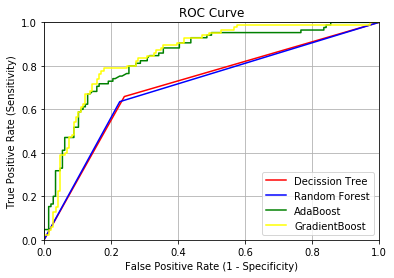

In [162]:
Plot_Roc_Classification(df, 0, 'Outcome', folds=10)

In [ ]:
#############################################  OPTIONAL QUESTION  ######################################################

In [163]:
###############Question16         Optional Question on Voting Classifier ...............

In [197]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [198]:
estimator = [] 
estimator.append(('DC', DecisionTreeClassifier(criterion='entropy'))) 
estimator.append(('RF', RandomForestClassifier(n_estimators=2))) 
estimator.append(('AB', AdaBoostClassifier())) 
estimator.append(('GB', GradientBoostingClassifier())) 



In [199]:
estimator

[('DC',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('AB', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=50, random_state=None)),
 ('GB', GradientBoostingClassifier(crite

In [209]:
# Voting Classifier with hard voting 
model = VotingClassifier(estimators = estimator, voting='soft') 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 

 

___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[119  27]
 [ 31  54]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9962756052141527

Test Accuracy   : 0.7489177489177489

Precision Score : 0.6666666666666666

Recall Score    : 0.6352941176470588

F1 Score        : 0.6506024096385542

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       146
           1       0.67      0.64      0.65        85

   micro avg       0.75      0.75      0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

___________________________________________________



AUC(Area Under the Curve) : 0.8367445608380338
So the modle has 83.67% chances of Distinguishing between Positive and Negat

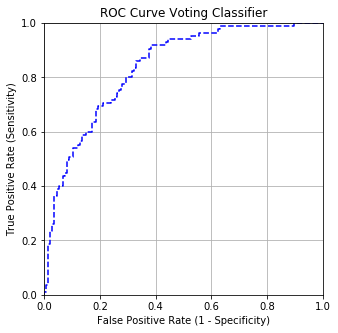

In [212]:
#Printing Confustion Matrix and Classification Report for Adaboost and Printing ROC -CURVER FOR ADABOOST
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________\n")

#Printing ROC Curver
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print("\n\nAUC(Area Under the Curve) : {0}".format(auc))
print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label='Bagging Classifier', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve Voting Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Voting Classifier y_test and y_pred Distribution Plot
y_test(Red) and y_pred(Green) --- Distributions


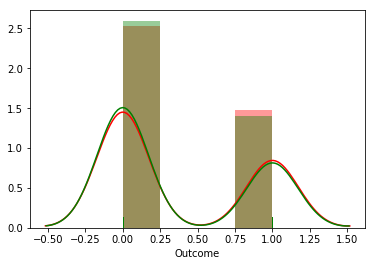

In [211]:
print("Voting Classifier y_test and y_pred Distribution Plot")
print("y_test(Red) and y_pred(Green) --- Distributions")
sns.distplot(y_test, kde=True, rug=True, color='red')
sns.distplot(y_pred, kde=True, rug=True, color = 'green')

In [ ]:
#y_pred in Green is Closely Following y_test in Red for Voting Classifier